In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

attributes = pd.read_csv('/content/drive/MyDrive/datasets/attributes.csv')
data_set = pd.read_csv('/content/drive/MyDrive/datasets/data_set.csv')


Mounted at /content/drive


# **Análise Exploratória**

In [ ]:
attributes.head(30)

,Attribute,Description,Type,Categorization
0,VDRL_RESULT,VDRL result,Binary,(i) Positive and (ii) Negative
1,CONS_ALCOHOL,Consume alcohol,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
2,RH_FACTOR,RH factor,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
3,SMOKER,Smoker,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
4,PLAN_PREGNANCY,Planned pregnancy,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
5,BLOOD_GROUP,Blood group,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
6,HAS_PREG_RISK,Has pregnancy risk,Categorical,"(i) O, (ii) A, (iii) B, (iv) AB,\nand (v) Not ..."
7,TET_VACCINE,Tetanus vaccination,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
8,IS_HEAD_FAMILY,Is head of family,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
9,MARITAL_STATUS,Marital status,Categorical,"(i) Single, (ii) Married, (iii) Widowed,\n(iv)..."


In [ ]:
data_set.head(10)

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0
5,1.0,1.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,...,1.0,3.0,0.0,2.0,2.0,2.0,3.0,1.0,2.0,25.0
6,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,6.0,0.0,3.0,1.0,1.0,0.0,0.0,2.0,25.0
7,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,6.0,0.0,3.0,1.0,1.0,0.0,0.0,2.0,25.0
8,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,6.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
9,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,7.0,0.0,4.0,0.0,0.0,3.0,0.0,2.0,25.0


In [ ]:
print(data_set.isnull().sum())
data_set.describe()

VDRL_RESULT          0
CONS_ALCOHOL         0
RH_FACTOR            0
SMOKER               0
PLAN_PREGNANCY       0
BLOOD_GROUP          0
HAS_PREG_RISK        0
TET_VACCINE          0
IS_HEAD_FAMILY       0
MARITAL_STATUS       0
FOOD_INSECURITY      0
NUM_ABORTIONS        0
NUM_LIV_CHILDREN     0
NUM_PREGNANCIES      0
FAM_PLANNING         0
TYPE_HOUSE           0
HAS_FAM_INCOME       0
LEVEL_SCHOOLING      0
CONN_SEWER_NET       0
NUM_RES_HOUSEHOLD    0
HAS_FRU_TREE         0
HAS_VEG_GARDEN       0
FAM_INCOME           0
HOUSING_STATUS       0
WATER_TREATMENT      0
AGE                  0
dtype: int64


,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
count,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,...,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000
mean,0.980221,1.068890,0.714789,1.040683,0.648700,1.810474,0.918299,0.164911,0.960251,2.380657,...,0.251449,4.459892,0.504621,3.269527,0.985393,1.072003,1.219913,0.720152,1.851755,25.191729
std,0.139241,0.353034,0.931219,0.331452,0.573161,1.676994,0.412945,0.475779,0.499563,2.284152,...,0.433851,1.732288,0.624362,0.983791,0.588661,0.494758,1.225242,0.936227,1.160388,4.561691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,4.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,25.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,5.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,2.000000,25.000000
75%,1.000000,1.000000,2.000000,1.000000,1.000000,4.000000,1.000000,0.000000,1.000000,5.000000,...,1.000000,5.000000,1.000000,4.000000,1.000000,1.000000,3.000000,1.000000,2.000000,25.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,5.000000,...,1.000000,9.000000,2.000000,5.000000,2.000000,2.000000,3.000000,3.000000,4.000000,51.000000


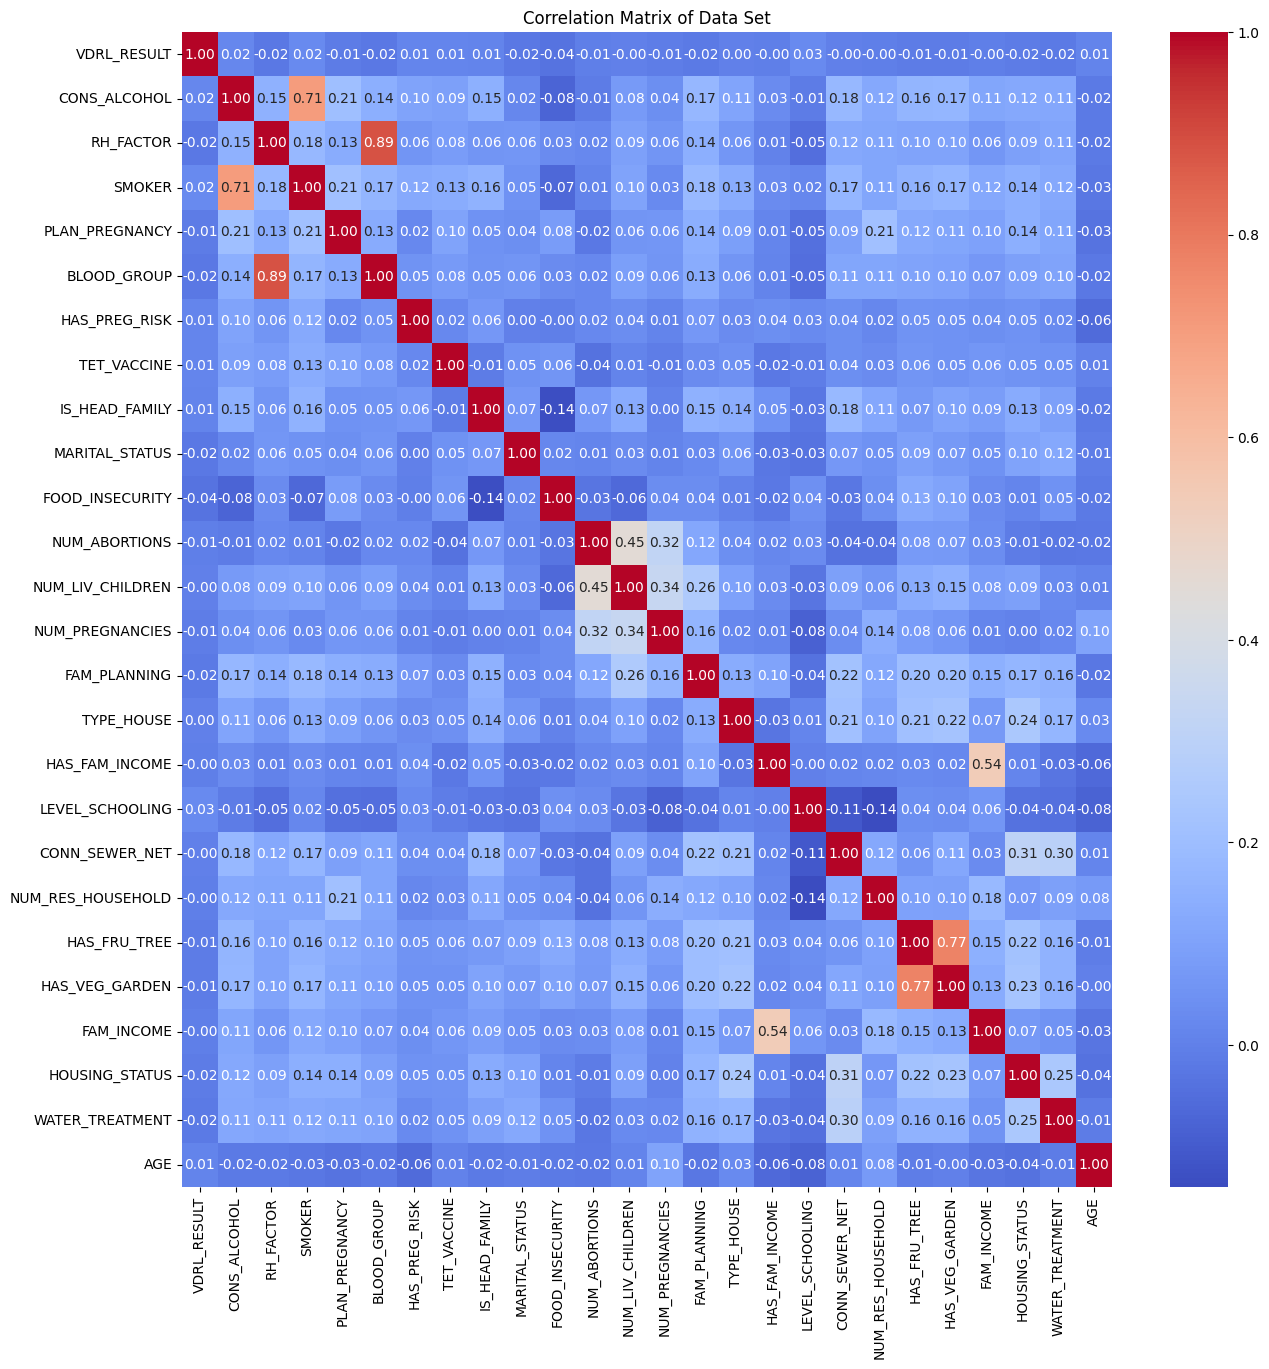

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_set.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Data Set')
plt.show()

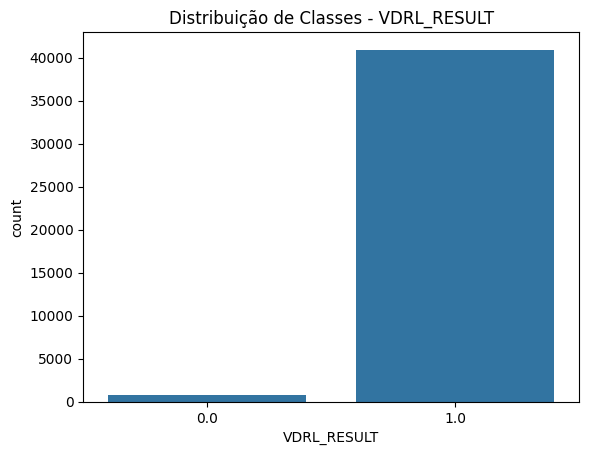

In [ ]:
sns.countplot(x='VDRL_RESULT', data=data_set)
plt.title('Distribuição de Classes - VDRL_RESULT')
plt.show()

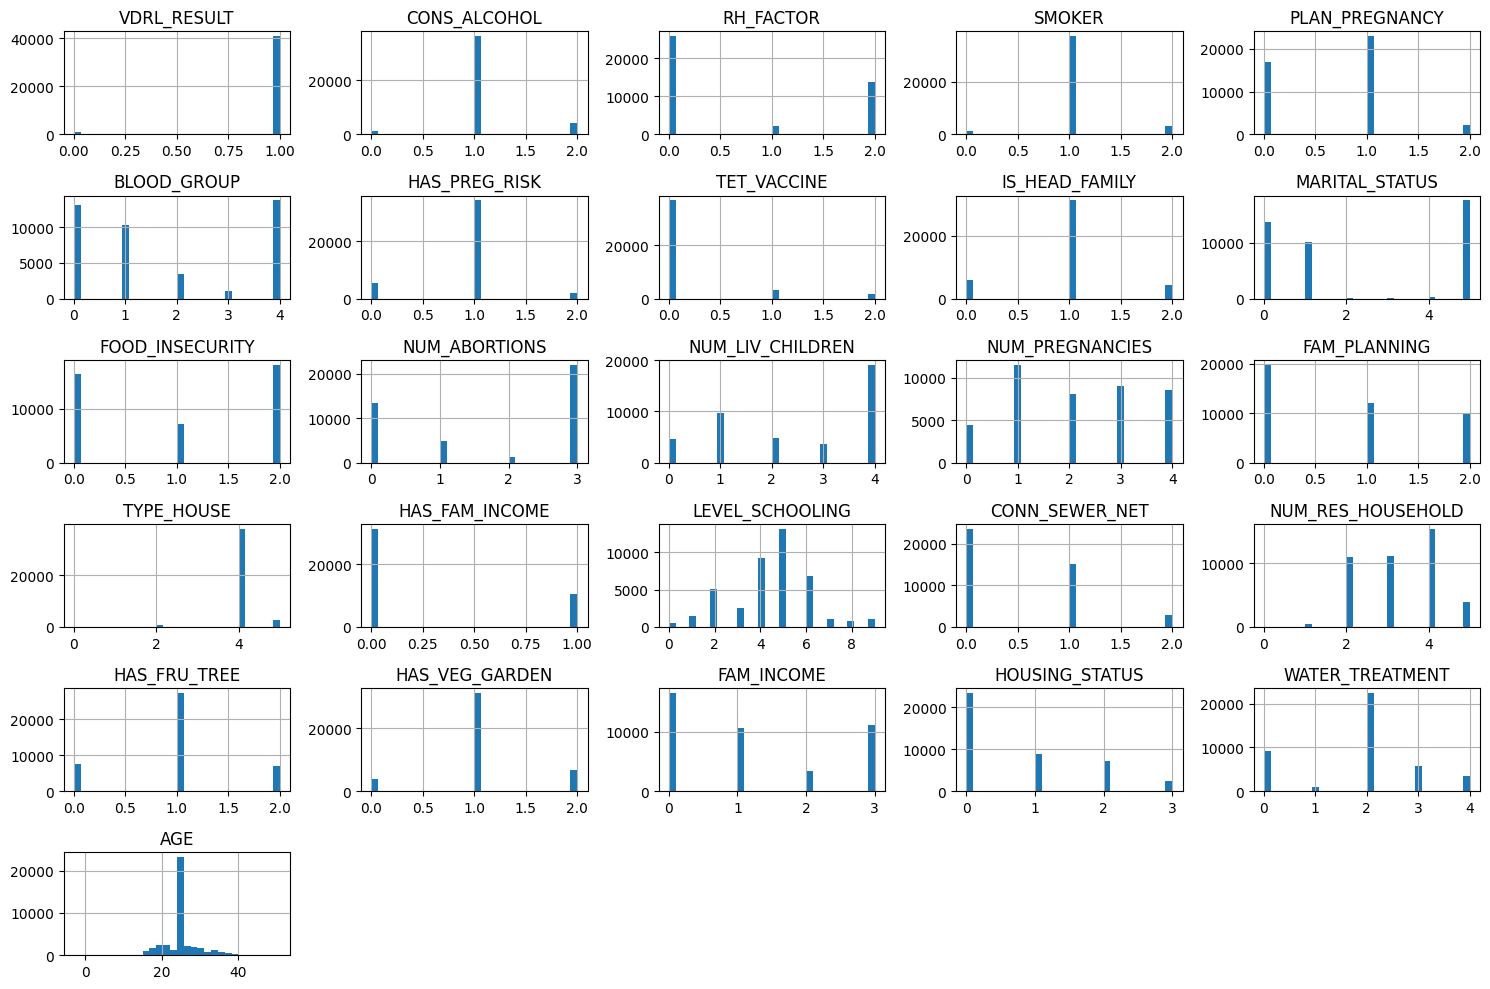

In [ ]:
# Analisar a distribuição das variáveis numéricas
data_set.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

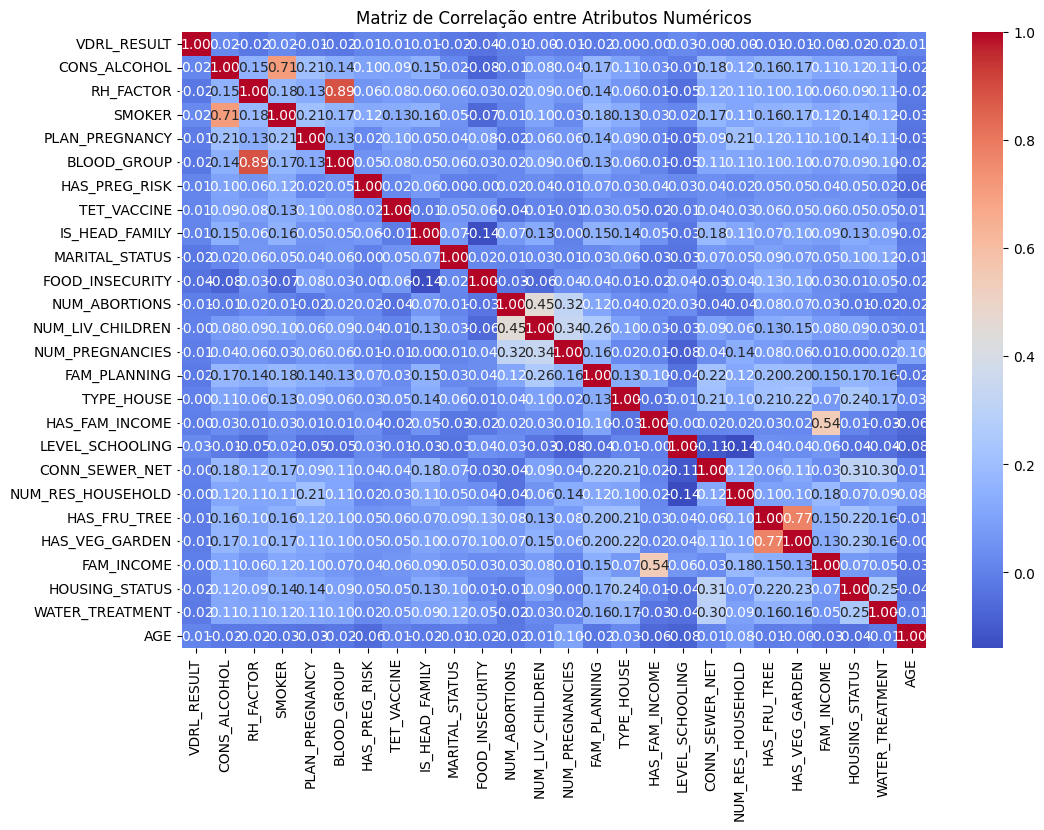

In [ ]:
corr = data_set.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Atributos Numéricos')
plt.show()

# **Balanceamento dos Dados**

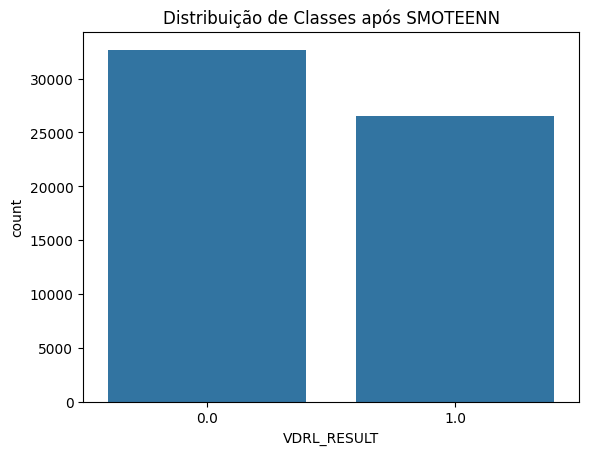

In [ ]:
# Imputação de valores ausentes
imputer = SimpleImputer(strategy="most_frequent")
data_set_imputed = pd.DataFrame(imputer.fit_transform(data_set), columns=data_set.columns)

# Codificação de variáveis categóricas
label_encoder = LabelEncoder()
for column in data_set.select_dtypes(include=['object']).columns:
    data_set_imputed[column] = label_encoder.fit_transform(data_set_imputed[column])

# Divisão dos dados em treino e teste
X = data_set_imputed.drop("VDRL_RESULT", axis=1)
y = data_set_imputed["VDRL_RESULT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicação da técnica de oversampling (SMOTEENN)
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Visualizar a nova distribuição de classes
sns.countplot(x=y_resampled)
plt.title('Distribuição de Classes após SMOTEENN')
plt.show()


# **Classificação VDRL_Result**

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Definição do k para k-Fold
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Definição das métricas
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Avaliação da Árvore de Decisão
dt_scores = cross_val_score(decision_tree, X_resampled, y_resampled, cv=kf, scoring='f1')
print(f'Árvore de Decisão - F1-score médio: {dt_scores.mean():.2f}')

# Avaliação da Floresta Aleatória
rf_scores = cross_val_score(random_forest, X_resampled, y_resampled, cv=kf, scoring='f1')
print(f'Floresta Aleatória - F1-score médio: {rf_scores.mean():.2f}')

Árvore de Decisão - F1-score médio: 0.97
Floresta Aleatória - F1-score médio: 0.99


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Inicialização dos modelos
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Definição do k para k-Fold
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Definição das métricas
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Avaliação da Árvore de Decisão
dt_accuracy = cross_val_score(decision_tree, X_resampled, y_resampled, cv=kf, scoring=scoring['accuracy'])
dt_precision = cross_val_score(decision_tree, X_resampled, y_resampled, cv=kf, scoring=scoring['precision'])
dt_recall = cross_val_score(decision_tree, X_resampled, y_resampled, cv=kf, scoring=scoring['recall'])
dt_f1 = cross_val_score(decision_tree, X_resampled, y_resampled, cv=kf, scoring=scoring['f1'])

print(f"Árvore de Decisão - Acurácia Média: {dt_accuracy.mean():.2f}")
print(f"Árvore de Decisão - Precisão Média: {dt_precision.mean():.2f}")
print(f"Árvore de Decisão - Recall Médio: {dt_recall.mean():.2f}")
print(f"Árvore de Decisão - F1-score Médio: {dt_f1.mean():.2f}")

# Avaliação da Floresta Aleatória
rf_accuracy = cross_val_score(random_forest, X_resampled, y_resampled, cv=kf, scoring=scoring['accuracy'])
rf_precision = cross_val_score(random_forest, X_resampled, y_resampled, cv=kf, scoring=scoring['precision'])
rf_recall = cross_val_score(random_forest, X_resampled, y_resampled, cv=kf, scoring=scoring['recall'])
rf_f1 = cross_val_score(random_forest, X_resampled, y_resampled, cv=kf, scoring=scoring['f1'])

print(f"Floresta Aleatória - Acurácia Média: {rf_accuracy.mean():.2f}")
print(f"Floresta Aleatória - Precisão Média: {rf_precision.mean():.2f}")
print(f"Floresta Aleatória - Recall Médio: {rf_recall.mean():.2f}")
print(f"Floresta Aleatória - F1-score Médio: {rf_f1.mean():.2f}")

Árvore de Decisão - Acurácia Média: 0.97
Árvore de Decisão - Precisão Média: 0.98
Árvore de Decisão - Recall Médio: 0.96
Árvore de Decisão - F1-score Médio: 0.97
Floresta Aleatória - Acurácia Média: 0.99
Floresta Aleatória - Precisão Média: 0.98
Floresta Aleatória - Recall Médio: 1.00
Floresta Aleatória - F1-score Médio: 0.99


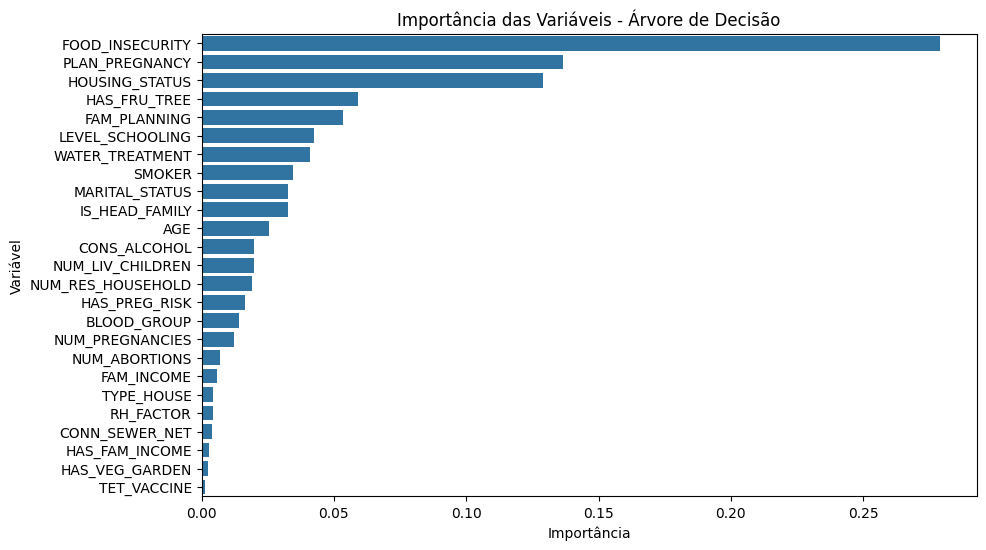

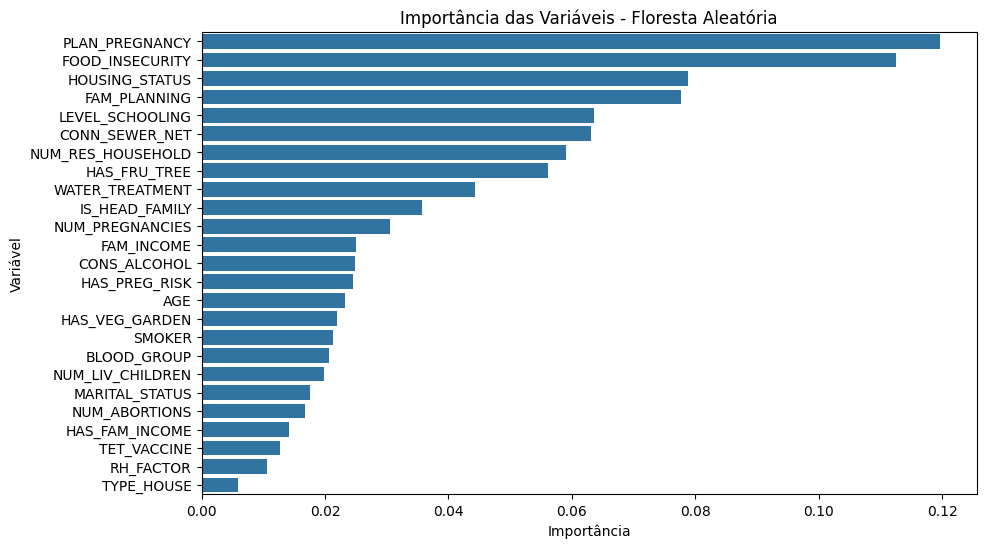

In [ ]:
# Treinamento dos modelos
decision_tree.fit(X_resampled, y_resampled)
random_forest.fit(X_resampled, y_resampled)

# Importância das variáveis na Árvore de Decisão
dt_feature_importances = pd.DataFrame({
    'Variável': X.columns,
    'Importância': decision_tree.feature_importances_
}).sort_values(by='Importância', ascending=False)

# Importância das variáveis na Floresta Aleatória
rf_feature_importances = pd.DataFrame({
    'Variável': X.columns,
    'Importância': random_forest.feature_importances_
}).sort_values(by='Importância', ascending=False)

# Visualização da importância das variáveis na Árvore de Decisão
plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Variável', data=dt_feature_importances)
plt.title('Importância das Variáveis - Árvore de Decisão')
plt.show()

# Visualização da importância das variáveis na Floresta Aleatória
plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Variável', data=rf_feature_importances)
plt.title('Importância das Variáveis - Floresta Aleatória')
plt.show()

#**Regressão AGE**

In [ ]:
X = data_set_imputed.drop("AGE", axis=1)
y = data_set_imputed["AGE"]

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mask = y_test != 0
y_test_filtered = y_test[mask]

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Previsões no conjunto de teste
y_pred = rf_regressor.predict(X_test)

y_pred_filtered = y_pred[mask]

# Cálculo das métricas
mae = mean_absolute_error(y_test_filtered, y_pred_filtered)
mse = mean_squared_error(y_test_filtered, y_pred_filtered)
mape = (abs((y_test_filtered - y_pred_filtered) / y_test_filtered).mean()) * 100

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 2.87
MSE: 16.93
MAPE: 12.31%


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Definição do k para K-Fold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Função para calcular MAPE (não é nativa do sklearn, então criamos uma função personalizada)
def mape_score(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Lista para armazenar os resultados das métricas
mae_scores = []
mse_scores = []
mape_scores = []

# Loop de validação cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinamento do modelo
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_regressor.fit(X_train, y_train)

    # Previsões
    y_pred = rf_regressor.predict(X_test)

    # Filtrando valores para evitar divisões por zero (se necessário)
    mask = y_test != 0
    y_test_filtered = y_test[mask]
    y_pred_filtered = y_pred[mask]

    # Cálculo das métricas
    mae_scores.append(mean_absolute_error(y_test_filtered, y_pred_filtered))
    mse_scores.append(mean_squared_error(y_test_filtered, y_pred_filtered))
    mape_scores.append(mape_score(y_test_filtered, y_pred_filtered))

# Exibição dos resultados médios
print(f"MAE Médio: {np.mean(mae_scores):.2f}")
print(f"MSE Médio: {np.mean(mse_scores):.2f}")
print(f"MAPE Médio: {np.mean(mape_scores):.2f}%")

MAE Médio: 2.88
MSE Médio: 16.94
MAPE Médio: 12.07%


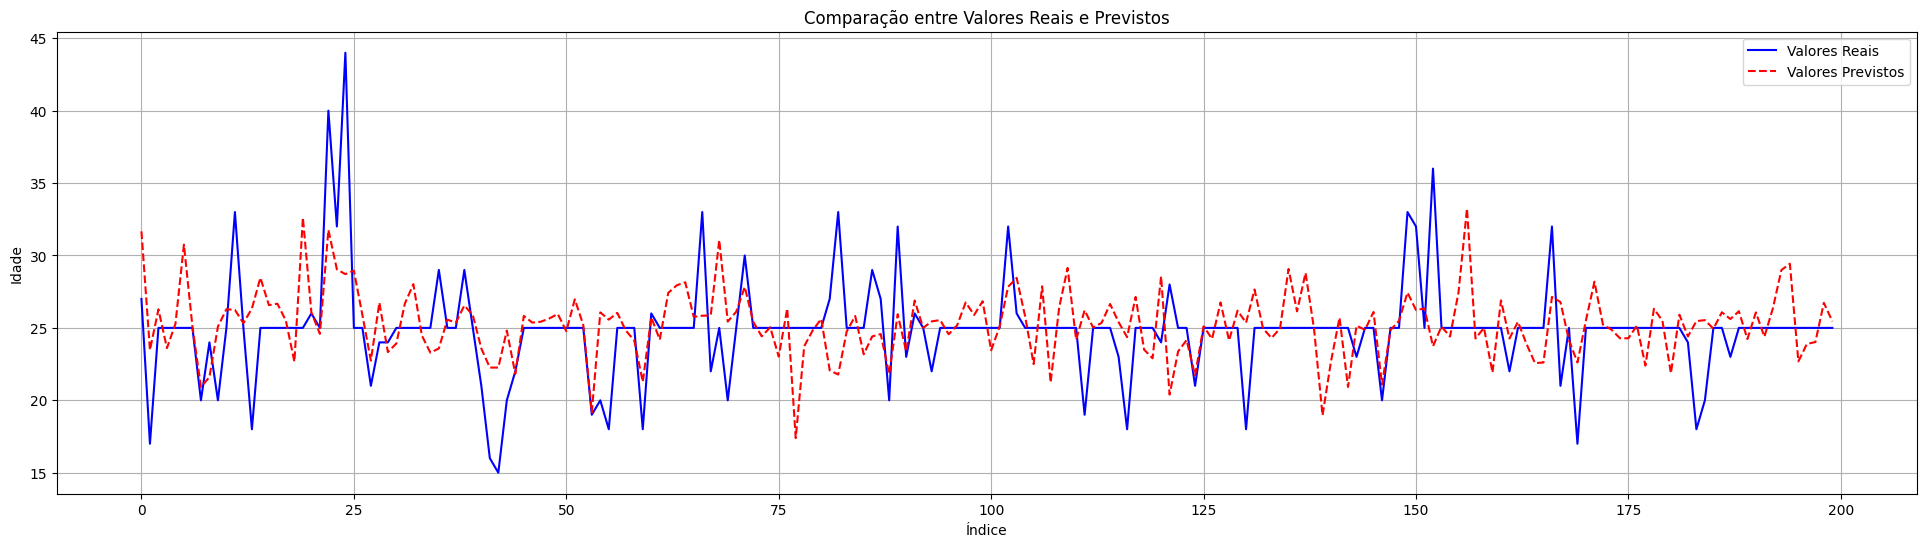

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Seleção dos primeiros 1000 índices
y_test_filtered_1000 = y_test_filtered[200:400]
y_pred_filtered_1000 = y_pred_filtered[200:400]

# Comparação entre valores reais e previstos (limite de 1000 índices)
plt.figure(figsize=(24, 6))
plt.plot(np.arange(len(y_test_filtered_1000)), y_test_filtered_1000, label="Valores Reais", color="blue", linestyle='-')
plt.plot(np.arange(len(y_pred_filtered_1000)), y_pred_filtered_1000, label="Valores Previstos", color="red", linestyle='--')
plt.title("Comparação entre Valores Reais e Previstos")
plt.xlabel("Índice")
plt.ylabel("Idade")
plt.legend()
plt.grid(True)
plt.show()

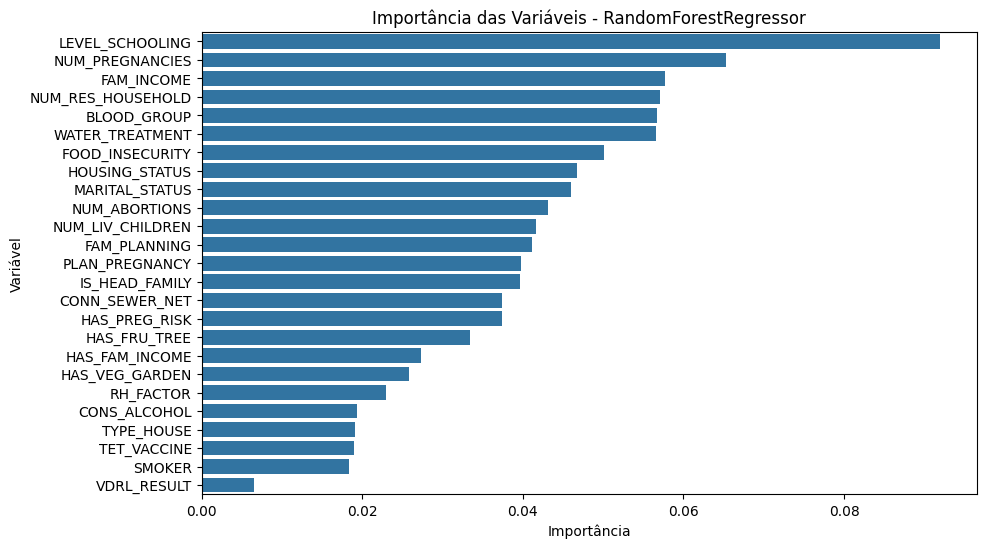

In [ ]:
# Extração da importância das variáveis
feature_importances = pd.DataFrame({
    'Variável': X.columns,
    'Importância': rf_regressor.feature_importances_
}).sort_values(by='Importância', ascending=False)

# Visualização
plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Variável', data=feature_importances)
plt.title('Importância das Variáveis - RandomForestRegressor')
plt.show()